# COMP0124 MAAI Coursework

This lab work has **two** parts.

## Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the Code-based questions, please create code shells after and write your Code in a new cell. For analysis reports or no-Code answers, you can use text shells only. 
3.  ***If you develop your answers on the basis of any code/materials from the Internet or elsewhere, please provide a reference and specify your own developments (piece of codes, experiments, analysis etc).   ***
4. If you have any questions, please contact TAs: [Minne Li](minne.li@cs.ucl.ac.uk), [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

## Part I: Normal Form Games [20 points]

In this part, you will try to solve the normal form game with full knowledge of the payoff for each player in the game.



### Q1: Consider the two-player two-action normal-form game indiciated by the payoff matrices below:

$$
\mathbf{R}^A = \left[\begin{matrix}
0 & 3 \\
1 & 2
\end{matrix}\right] 
\quad 
\mathbf{R}^B = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right],
$$
where the player A chooses action $i \in \{1,2\}$ and the player B chooses action $j \in \{1,2\}$, then the player A and player B receive the rewards $R^A_{ij}$ and $R^B_{ij}$ respectively.

Answer the following two questions (write down your answers using the provided text cell below and add code blocks when needed): 

(a) **[9 points]** To solve this game, we consider using different gradient-based algorithms to adjust agent's strategies at each iteration. Use Python to implement the following three algorithms from Lecture 8/9: 1) [Infinitesimal Gradient Ascent (IGA)](https://www.sciencedirect.com/science/article/pii/S0004370202001212), 2) [IGA WoLF (Win or Learn Fast)](https://www.sciencedirect.com/science/article/pii/S0004370202001212), 3) [IGA-PP](https://www.aaai.org/ocs/index.php/AAAI/AAAI10/paper/view/1885). (Alternatively, you are allowed to implement an alterative method to replace one of them above but please inform TAs). Use Python to plot the learning processes of the above three algorithms. [***Hint***: As an example, the learning process of IGA-PP is shown below, where agents are approaching the Nash equilibrium (0.5, 0.5) of this game, but you don't need to have the exact plot and are free to develop your own plot to best describe your learning process as you wish].  


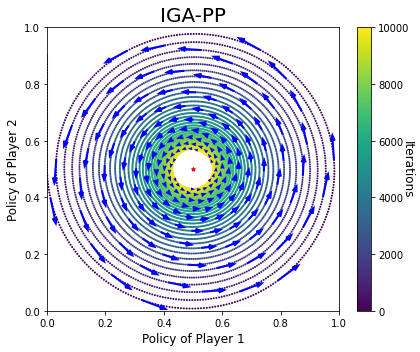

(b) **[11 points]** Discuss your implemenation and compare the results. [**Guidance**: This is the place for you to demonstrate your thoughts, understanding, further analysis and experiments of the implementations. For example, you can point out the weakness/strength of the methods you discovered and give evidence and if possible provide your improved version, or you may discuss the convergency and the speed of convergence of the implemented algorithms with (1) different payoff matrices of your choice, (2) different algorithm hyperparameters (if any), and (3) different starting points (initial policies)].



---


*Your answer here: insert code and text cells as needed*


---




### a)

For each of the IGA, IGA-WoLF, and IGA-PP algorithm's implementation, I add a constraint to $α$ and $β$ so that they won't be less than 0 or larger than 1 during the learning process.

In [ ]:
import numpy as np

In [ ]:
Ra = np.array([[0,3],[1,2]])
Rb = np.array([[3,2],[0,1]])

In [ ]:
# using nashpy for plotting the n.e. point like the red star from given sample
!pip -q install nashpy
import nashpy as nash
# function for get the n.e. and its values from given matrices
def get_value(a,b,arg = 'value'):
  game = nash.Game(a, b)
  eq1,eq2=0,0
  equilibria = game.support_enumeration()
  for idx, eq in enumerate(equilibria):
    eq1= eq[0]
    eq2= eq[1]
    # return n.e. for each players
    if arg != 'value':
      return eq1, eq2
    #break
  # return n.e. values for each players 
  if arg == 'value':
    return sum(eq[0]*a[-1]),sum(eq[1]*b[:,-1])
    
def get_v(payoff):
    #Compute value of the game 
    v = (payoff[0][0] * payoff[1][1] - payoff[1][0] * payoff[0][1]) / (
        payoff[0][0] - payoff[0][1] + payoff[1][1] - payoff[1][0])
    return v


alpha_star, beta_star = get_value(Ra, Rb,'ne')

print('Optimal strategy for P1', alpha_star[0], ', P2', beta_star[0],
      ', value of the game for P1', get_v(Ra),
      ', value of the game for P2', get_v(Rb))

Optimal strategy for P1 0.5 , P2 0.5 , value of the game for P1 1.5 , value of the game for P2 1.5


In [ ]:
# compute u for player
def get_u(r):
  return r[0][0] - r[0][1] - r[1][0] + r[1][1]

# compute gradient for each players
def dV(a, b, Ra, Rb):
  dVr = b * get_u(Ra) + (Ra[0][1] - Ra[1][1])
  dVc = a * get_u(Rb) + (Rb[1][0] - Rb[1][1])
  return dVr, dVc

# update the gradient for each players
def grad_update(eta, a, b, Ra, Rb, la=1, lb=1):
  dVr, dVc = dV(a, b, Ra, Rb)
  a1 = a + eta * dVr * la  
  b1 = b + eta * dVc * lb
  return a1, b1

# expected payoff
def expected_payoff(alpha, beta, payoff):
    u = get_u(payoff)
    v = u * alpha * beta + alpha * (payoff[0][1]-payoff[1][1]) + beta * (payoff[1][0]-payoff[1][1]) + payoff[1][1]
    return v

In [ ]:
import matplotlib.pyplot as plt
# plotting function for learning process
def plot_result(laa, lbb, Ra, Rb):
    plt.plot(lbb,laa,'o')
    for i in range(len(lbb)-1):
        plt.annotate('',xy=(lbb[i+1],laa[i+1]),xytext=(lbb[i],laa[i]),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    
    alpha_star, beta_star = get_value(Ra, Rb,'ne')
    plt.plot(alpha_star[0],beta_star[0],'*')
    plt.title('Best response')
    plt.xlabel("Agent 2's action")
    plt.ylabel("Agent 1's action")
    
    my_x_ticks = np.arange(0, 1.2, 0.2)
    my_y_ticks = np.arange(0, 1.2, 0.2)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.show()

In [ ]:
itr = 10000
eta = 5e-4
threshold = 1e-5
a, b = np.random.uniform(0,1),np.random.uniform(0,1)

#### IGA

In [ ]:
def IGA(itr, eta, a, b, Ra, Rb, threshold, cov='yes'):
  al, bl = [], []
  for i in range(itr):
    # update a and b with gradient
    a1,b1 = grad_update(eta, a, b, Ra, Rb)
    # sample points for plotting the learning process
    if i % 200 == 0:
      al.append(a1)
      bl.append(b1)
    #plot 
    # if converage then break
    if np.abs(a - a1) <= threshold and np.abs(b - b1) <= threshold:
      if cov=='yes':
        print("converaged")
      al.append(a1)
      bl.append(b1)
      break
    a,b = max(0,min(a1,1)), max(0,min(b1,1))
    #a,b = a1,b1
  return al,bl,i+1

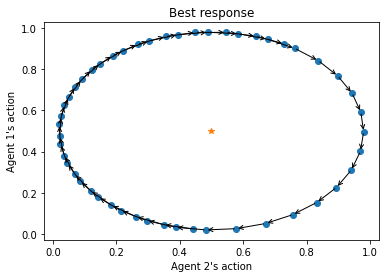

In [ ]:
al, bl,itr = IGA(itr, eta, a, b, Ra, Rb, threshold)
plot_result(al, bl, Ra, Rb)

#### IGA WoLF

In [ ]:
def IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min, l_max, cov='yes'):
  #get N.E. for each players
  alpha_star, beta_star = get_value(Ra, Rb,'ne')
  al, bl = [], []
  for i in range(itr):
    # get learning rates for each player
    lr = l_min if expected_payoff(a,b,Ra) > expected_payoff(alpha_star[0],b,Ra) else l_max
    lc = l_min if expected_payoff(a,b,Rb) > expected_payoff(alpha_star[0],beta_star[0],Rb) else l_max
    # update a and b with gradient
    a1, b1 = grad_update(eta, a, b, Ra, Rb, lr, lc)
    # sample points for plotting the learning process
    if i % 200 == 0:
      al.append(a1)
      bl.append(b1)
    #plot 
    # if converage then break
    if np.abs(a - a1) <= threshold and np.abs(b - b1) <= threshold:
      al.append(a1)
      bl.append(b1)
      if cov=='yes':
        print("converaged")
      break
    #a,b = a1,b1
    a,b = max(0,min(a1,1)), max(0,min(b1,1))
  return al, bl, i+1

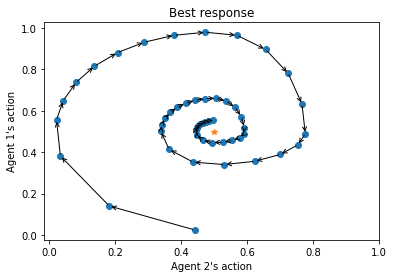

In [ ]:
al_w, bl_w, itr_w = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=1, l_max=3)
plot_result(al_w, bl_w, Ra, Rb)

#### IGA-PP

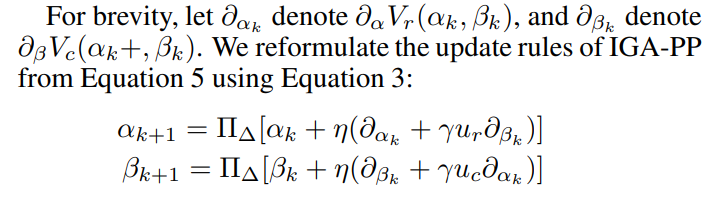

In [ ]:
def IGA_PP(itr, eta, a, b, Ra, Rb, threshold, gamma, cov='yes'):
  al, bl = [], []
  for i in range(itr):
    #get u
    ua = get_u(Ra)
    ub = get_u(Rb)
    # get gradient
    da, db = dV(a, b, Ra, Rb)
    ga = da + gamma * ua * db
    gb = db + gamma * ub * da
    # update a and b with gradient
    a1 = a + eta * ga  
    b1 = b + eta * gb
    # sample points for plotting the learning process
    if i % 200 == 0:
      al.append(a1)
      bl.append(b1)
    # if converage then break
    if np.abs(a - a1) <= threshold and np.abs(b - b1) <= threshold:
      al.append(a1)
      bl.append(b1)
      if cov == 'yes':
        print("converaged")
      break
    a,b = max(0,min(a1,1)), max(0,min(b1,1))
    #a, b = a1, b1
    #print(ga, gb,a,b)
  return al, bl, i+1

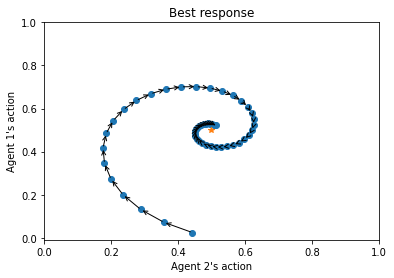

In [ ]:
al_pp, bl_pp, itr_pp = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=0.15)
plot_result(al_pp, bl_pp, Ra, Rb)

### b)

(b) [11 points] Discuss your implemenation and compare the results. [Guidance: This is the place for you to demonstrate your thoughts, understanding, further analysis and experiments of the implementations. For example, you can point out the weakness/strength of the methods you discovered and give evidence and if possible provide your improved version, or you may discuss the convergency and the speed of convergence of the implemented algorithms with (1) different payoff matrices of your choice, (2) different algorithm hyperparameters (if any), and (3) different starting points (initial policies)].

In [ ]:
Ra = np.array([[0,3],[1,2]])
Rc = np.array([[1, -1], [-1, 1]])

Rb = np.array([[3,2],[0,1]])
itr = 10000
eta = 5e-4
threshold = 1e-5
#initlize the start a and b
a, b = np.random.uniform(0,1),np.random.uniform(0,1)
print(a,b)

0.669659654649221 0.21202405821992643


### Different payoff matrices between normal game and zero-sum game:

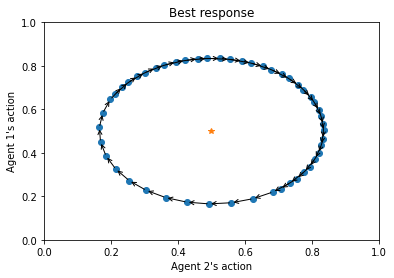

iterations for this situation is: 10000


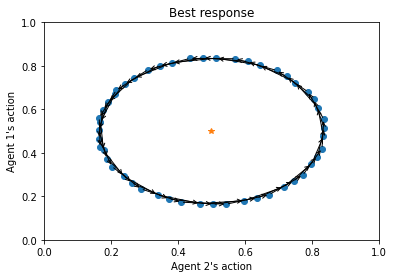

iterations for this situation is: 10000


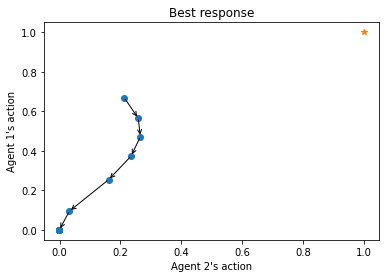

iterations for this situation is: 10000


In [ ]:
#payoff matrices for normal game
al_b11, bl_b11,itr_b11 = IGA(itr, eta, a, b, Ra, Rb, threshold)
plot_result(al_b11, bl_b11, Ra, Rb)
print("iterations for this situation is:",itr_b11)
#payoff matrices for zero-sum game
al_b12, bl_b12,itr_b12 = IGA(itr, eta, a, b, Rc, -Rc, threshold)
plot_result(al_b12, bl_b12, Rc, -Rc)
print("iterations for this situation is:",itr_b12)
#same payoff matrices for players
al_b12, bl_b12,itr_b12 = IGA(itr, eta, a, b, Rc, Rc, threshold)
plot_result(al_b12, bl_b12, Rc, Rc)
print("iterations for this situation is:",itr_b12)

converaged


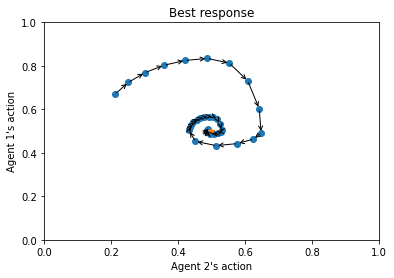

iterations for this situation is: 6783
converaged


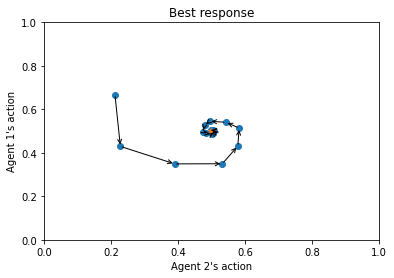

iterations for this situation is: 3014


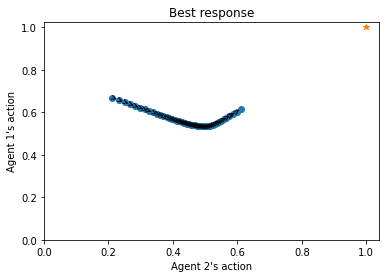

iterations for this situation is: 10000


In [ ]:
#payoff matrices for normal game
al_wb11, bl_wb11, itr_wb11 = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=1, l_max=5)
plot_result(al_wb11, bl_wb11, Ra, Rb)
print("iterations for this situation is:",itr_wb11)

#payoff matrices for zero-sum game
al_wb11, bl_wb11, itr_wb11 = IGA_WoLF(itr, eta, a, b, Rc, -Rc, threshold, l_min=1, l_max=3.5)
plot_result(al_wb11, bl_wb11, Rc, -Rc)
print("iterations for this situation is:",itr_wb11)
#same payoff matrices for players
al_wb11, bl_wb11, itr_wb11 = IGA_WoLF(itr, eta, a, b, Rc, Rc, threshold, l_min=0.1, l_max=0.3)
plot_result(al_wb11, bl_wb11, Rc, Rc)
print("iterations for this situation is:",itr_wb11)

converaged


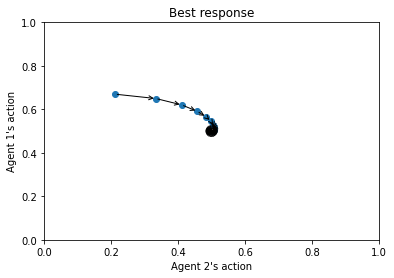

iterations for this situation is: 7905
converaged


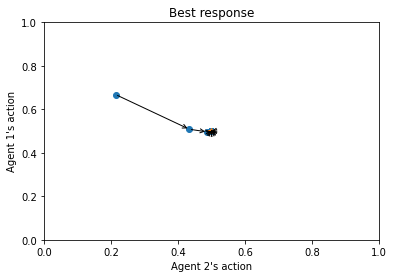

iterations for this situation is: 2126


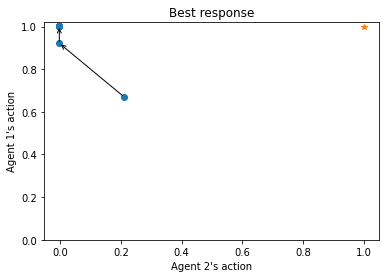

iterations for this situation is: 10000


In [ ]:
#payoff matrices for normal game
al_pp_b11, bl_pp_b11, itr_pp_b11 = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=1)
plot_result(al_pp_b11, bl_pp_b11, Ra, Rb)
print("iterations for this situation is:",itr_pp_b11)
#payoff matrices for zero-sum game
al_pp_b22, bl_pp_b22, itr_pp_b22 = IGA_PP(itr, eta, a, b, Rc, -Rc, threshold=1e-10, gamma=1)
plot_result(al_pp_b22, bl_pp_b22, Rc, -Rc)
print("iterations for this situation is:",itr_pp_b22)
#same payoff matrices for players
al_pp_b22, bl_pp_b22, itr_pp_b22 = IGA_PP(itr, eta, a, b, Rc, Rc, threshold=1e-10, gamma=1)
plot_result(al_pp_b22, bl_pp_b22, Rc, Rc)
print("iterations for this situation is:",itr_pp_b22)

From plots of the different payoff matrices given, as normal game and zero-sum game for IGA, IGA_Wolf, IGA_PP, all of these three algorithms might not converaged for same payoff matrices for both players. They all worked for most of times at the situation for normal game with different payoff matrices and zero-sum game.
In addition, for the worked situation, vallina IGA only can converge to an ellipse with center is the N.E. Both of the IGA_Wolf and IGA_PP can show their converagency for the normal game and zero-sum game. From these plots, we can also find that the learning process for IGA_PP is more smoother than IGA_Wolf, this is because the update hyperparameter for IGA_Wolf is controlled by its two different value learning rate.

### Different algorithm hyperparameters

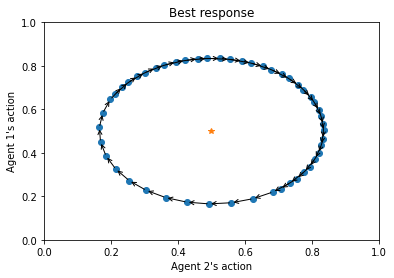

iterations for this situation is: 10000


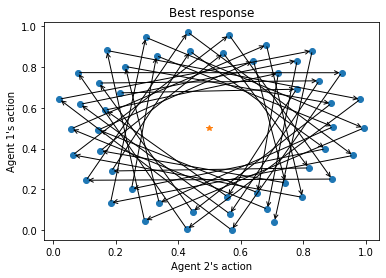

iterations for this situation is: 10000


In [ ]:
al_b21, bl_b21,itr_b21 = IGA(itr, eta, a, b, Ra, Rb, threshold)
plot_result(al_b21, bl_b21, Ra, Rb)
print("iterations for this situation is:",itr_b21)

al_b22, bl_b22,itr_b22 = IGA(itr, eta*10, a, b, Ra, Rb, threshold)
plot_result(al_b22, bl_b22, Ra, Rb)
print("iterations for this situation is:",itr_b22)


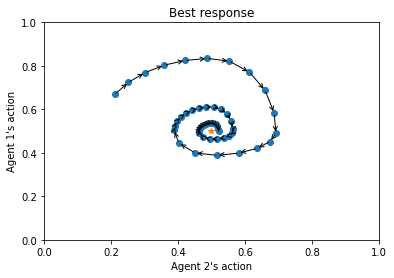

iterations for this situation is: 10000
converaged


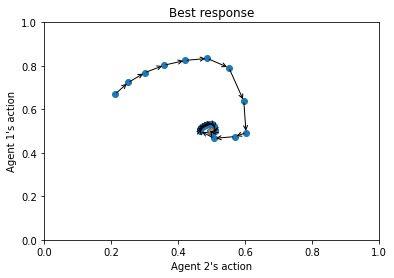

iterations for this situation is: 4891
converaged


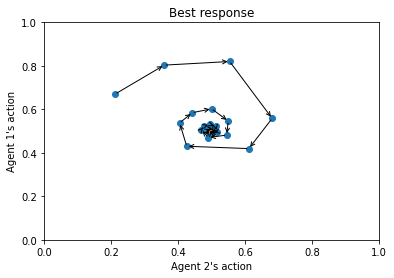

iterations for this situation is: 4832
converaged


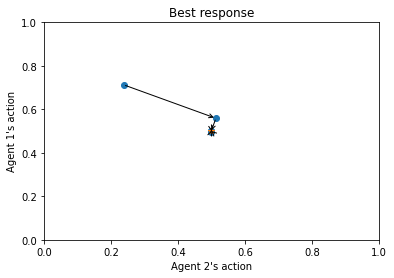

iterations for this situation is: 953


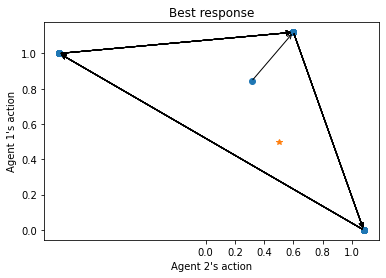

iterations for this situation is: 10000


In [ ]:
al_wb21, bl_wb21, itr_wb21 = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=1, l_max=3)
plot_result(al_wb21, bl_wb21, Ra, Rb)
print("iterations for this situation is:",itr_wb21)
al_wb22, bl_wb22, itr_wb22 = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=1, l_max=10)
plot_result(al_wb22, bl_wb22, Ra, Rb)
print("iterations for this situation is:",itr_wb22)
al_wb23, bl_wb23, itr_wb23 = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=3, l_max=10)
plot_result(al_wb23, bl_wb23, Ra, Rb)
print("iterations for this situation is:",itr_wb23)

al_wb23, bl_wb23, itr_wb23 = IGA_WoLF(itr, eta*50, a, b, Ra, Rb, threshold, l_min=3, l_max=10)
plot_result(al_wb23, bl_wb23, Ra, Rb)
print("iterations for this situation is:",itr_wb23)

al_wb23, bl_wb23, itr_wb23 = IGA_WoLF(itr, eta*200, a, b, Ra, Rb, threshold, l_min=3, l_max=10)
plot_result(al_wb23, bl_wb23, Ra, Rb)
print("iterations for this situation is:",itr_wb23)

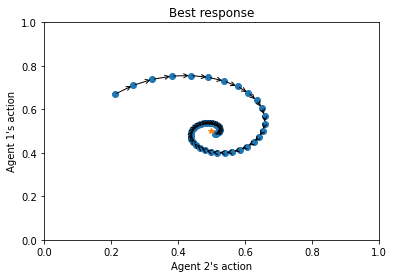

iterations for this situation is: 10000
converaged


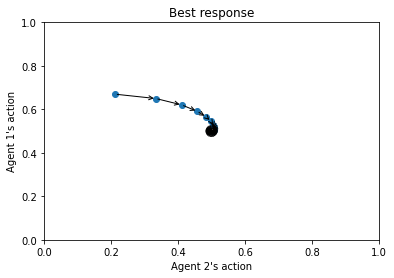

iterations for this situation is: 7905
converaged


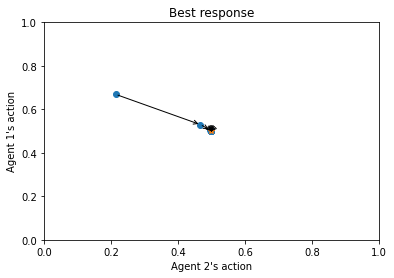

iterations for this situation is: 1708
converaged


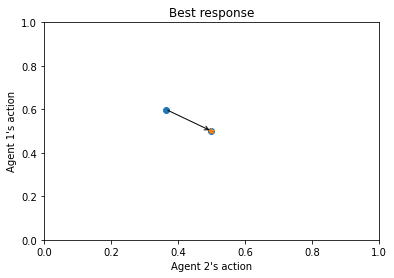

iterations for this situation is: 32


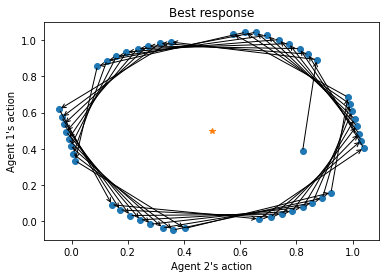

iterations for this situation is: 10000


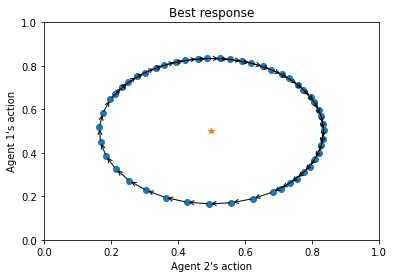

iterations for this situation is: 10000


In [ ]:
al_pp_b21, bl_pp_b21, itr_pp_b21 = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=0.15)
plot_result(al_pp_b21, bl_pp_b21, Ra, Rb)
print("iterations for this situation is:",itr_pp_b21)
al_pp_b22, bl_pp_b22, itr_pp_b22 = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=1)
plot_result(al_pp_b22, bl_pp_b22, Ra, Rb)
print("iterations for this situation is:",itr_pp_b22)
al_pp_b23, bl_pp_b23, itr_pp_b23 = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=5)
plot_result(al_pp_b23, bl_pp_b23, Ra, Rb)
print("iterations for this situation is:",itr_pp_b23)

al_pp_b23, bl_pp_b23, itr_pp_b23 = IGA_PP(itr, eta*50, a, b, Ra, Rb, threshold=1e-10, gamma=5)
plot_result(al_pp_b23, bl_pp_b23, Ra, Rb)
print("iterations for this situation is:",itr_pp_b23)

al_pp_b23, bl_pp_b23, itr_pp_b23 = IGA_PP(itr, eta*200, a, b, Ra, Rb, threshold=1e-10, gamma=5)
plot_result(al_pp_b23, bl_pp_b23, Ra, Rb)
print("iterations for this situation is:",itr_pp_b23)
al_pp_b23, bl_pp_b23, itr_pp_b23 = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=0.0000000005)
plot_result(al_pp_b23, bl_pp_b23, Ra, Rb)
print("iterations for this situation is:",itr_pp_b23)

In this part, from above experiments we can find that IGA is not converage for the given noraml form payoff matrices, and IGA_Wolf and IGA_PP are convergency for given noral form payoff matrices. In addition, hyparameter $\eta$, l_min and l_max (for IGA_Wolf), $\gamma$ (for IGA_PP) do affect the speed of convergence.

In general, compare with an $\eta$ with very small value a suitable larger $\eta$ could accelerate the speed of learning so that make the convergency faster for model IGA_Wolf and IGA_PP. However, too large $\eta$ could cause the update for gradient too large so that it might jump the optimal point in the learning process and hereby hardly to converage. Comparsion plots can be find on plot 1&2 for IGA part, plot 3&4&5 for IGA_Wolf and IGA_PP part.

For the l_min, l_max hyerparameters in IGA_Wolf model, both of them in a suitable range would made the learning model converage from the given normal payoff matrices. By adjust to larger values for l_min, l_max, especially l_max can some times accelerate the speed of learning, but one thing should be mentioned: for a too larger value of l_min it might slow down the speed of convergency of the model. Shown in the 2nd and 3rd plots for IGA_Wolf part, the iterations to reach converage with l_min = 3, l_max = 10 is more than l_min = 1, l_max = 10 used.

For the hyperparameter $\gamma$, in a suitable range make it with a larger value can also accelerate the convergance speed, as for plot 1&2&3 in IGA_PP part. However, when it is close to 0, IGA_PP will close to IGA due to its gradient update equations. (Shown in plot 6 at IGA_PP part) 


### Different starting points (initial policies)

In [ ]:
# for IGA_wolf
itr_wolf_r = 0
itr_pp_r = 0
itr_wolf_0 = 0
itr_pp_0 = 0
itr_wolf_1 = 0
itr_pp_1 = 0.5
for i in range(25):
  # random points
  a, b = np.random.uniform(0,1),np.random.uniform(0,1)
  _,_,w = IGA_WoLF(itr, eta, a, b, Ra, Rb, threshold, l_min=3, l_max=10,cov='n')
  _,_,p = IGA_PP(itr, eta, a, b, Ra, Rb, threshold=1e-10, gamma=1,cov='n')
  itr_wolf_r += w
  itr_pp_r += p
  # 0, 0
  _,_,w = IGA_WoLF(itr, eta, 0, 0, Ra, Rb, threshold, l_min=3, l_max=10,cov='n')
  _,_,p = IGA_PP(itr, eta, 0, 0, Ra, Rb, threshold=1e-10, gamma=1,cov='n')
  itr_wolf_0 += w
  itr_pp_0 += p
  #0,1
  _,_,w = IGA_WoLF(itr, eta, 0, 1, Ra, Rb, threshold, l_min=3, l_max=10,cov='n')
  _,_,p = IGA_PP(itr, eta, 0, 1, Ra, Rb, threshold=1e-10, gamma=1,cov='n')
  itr_wolf_1 += w
  itr_pp_1 += p
itr_wolf_r = itr_wolf_r/25
itr_pp_r = itr_pp_r/25
itr_wolf_0 = itr_wolf_0/25
itr_pp_0 = itr_pp_0/25
itr_wolf_1 = itr_wolf_1/25
itr_pp_1 = itr_pp_1/25

In [ ]:
print(itr_wolf_r,itr_wolf_0,itr_wolf_1)
print(itr_pp_r,itr_pp_0,itr_pp_1)

4803.44 5339.0 5498.0
7846.44 8169.0 8169.02


Comparing random choosen starting points and 2 pair of steady points (0,0) and (0,0.5), we tested the average iteration steps for they reached the convergency with given payoff matrices by running the learning model 25 times from each of these points . As a result, the strategy for choosing the initial starting point by unifom randomly selection is the fastest for reaching convergency for both of the IPA_Wolf and IPA_PP model.   

## Part II: Stochastic Games [30 points]

A stochastic game is defined by a tuple $(N, \mathcal{S}, \mathcal{A}_{1 \dots N}, T, \mathcal{R}_{1 \dots N})$, where

*   $N$ is the number of players,
*   $\mathcal{S}$ is the set of states,
*   $\mathcal{A}_i$ is the action set for the player $i$,
*   $T$ is the transition function $\mathcal{S} \times \mathcal{A}_1 \times \mathcal{A}_2 \dots \times \mathcal{A}_N \times \mathcal{S} \to [ 0, 1 ]$, and, 
*   $\mathcal{R}_i$ is the payoff function for player $i$: $\mathcal{R}_i : \mathcal{S} \times \mathcal{A}_1 \times \mathcal{A}_2 \dots \times \mathcal{A}_N \to \mathbb{R}$

In the stochastic game, each state corresponds to a normal-form game $G^{(s)}_i$ defined as
$$
G^{(s)}_i=\left(r_{i}\left(s, a_{i}, a_{-i}\right)+\gamma \sum_{s^{\prime}} p\left(s^{\prime} \mid s, a_{i}, a_{-i}\right) G^{(s \prime)}_i\right),
$$
where $i\in{1,...,N}$ and $\gamma \in [0,1]$ is a discount factor corresponding to the horizon of the game. After a payoff is made, it is then decided at random whether the game ends with probability $(1 - \gamma)$ and, if not, which state $s'$ should be played next. In a zero-sum stochastic game, we have a single value of the game as $G^{(s)}$ without referring to any individual agent. 

### Q2: Pollution tax game variation.

Consider a variant of pollution tax game [1] for an example of stochastic game. There are two firms which contribute to the emission of a certain pollutant and suppose that the government can detect only the combined emissions. The policy of the government is to impose no tax (tax = 0) if both the firms do not pollute, e.g., pollution level is 0 for both firms. It imposes less but the same tax (tax = 2) if the pollution level is at intermediate level, i.e, in $(0, 4]$. If the pollution level is high, i.e., more than 4, then the firms pay higher tax (tax = 4). Note that more production implies higher level of pollution. Thus, we can say that immediate reward (profit) of one firm increases with its pollution level and decreases with the pollution level of other firm. We assume that tax at time t − 1 is paid at time t by both the firms. We consider $\gamma \in [0,1]$ to be a discount factor corresponding to the horizon of the game. After a payoff is made, it is then decided at random whether the game ends with probability $(1 - \gamma)$ and, if not, which state $s'$ should be played next. This situation can be modeled as a 3-state stochastic game in the following way:

**State space.** State of the game is the tax imposed on the firms by the government. Thus $\mathcal{S}=\{0,2,4\}$. In other words, there are three tax states: 0, 2, 4, which indicates how much tax a firm has to pay to the government (either 0, 2,4)

**Action Spaces.** The actions of the firms are the level of pollution that they cause. It is different in different states.
- Action space for Firm 1 at (tax) state 0 , i.e., $\mathcal{A}_{1}(0)=\{0,3,5\}$.
- Action space for Firm 1 at (tax)state 2 , i.e., $\mathcal{A}_{1}(2)=\{0,2,3\}$.
- Action space for Firm 1 at (tax) state 4 , i.e., $\mathcal{A}_{1}(4)=\{0,2\}$.
- Action space for Firm 2 at (tax) state 0 , i.e., $\mathcal{A}_{2}(0)=\{0,3,5\}$.
- Action space for Firm 2 at (tax) state 2, i.e., $\mathcal{A}_{2}(2)=\{0,2,4\}$.
- Action space for Firm 2 at (tax) state 4 , i.e., $\mathcal{A}_{2}(4)=\{0,3\}$.

**Transition probabilities.** The transition probabilities are stationary and are given by
$$
\begin{array}{l}
p\left(s^{\prime}=0 \mid s, a_{1}, a_{2}\right)=1 \text { if } a_{1}+a_{2}=0 \\
p\left(s^{\prime}=2 \mid s, a_{1}, a_{2}\right)=1 \text { if } a_{1}+a_{2} \in(0,4] \\
p\left(s^{\prime}=4 \mid s, a_{1}, a_{2}\right)=1 \text { if } a_{1}+a_{2}>4
\end{array}
$$
for all $a_{1} \in \mathcal{A}_{1}(s), a_{2} \in \mathcal{A}_{2}(s)$ and $s \in S$.

**Reward**. We assume that the rewards of both the players are stationary. Recall that tax at time $t-1$ is the state of the game at time $t$. So, the rewards of both the players are given by
$$
\begin{array}{l}
r_{1}\left(s, a_{1}, a_{2}\right)=5+\frac{1}{4} a_{1}-\frac{1}{5} a_{2}-s \\
r_{2}\left(s, a_{1}, a_{2}\right)=6+\frac{1}{3} a_{2}-\frac{1}{5} a_{1}-s
\end{array}
$$
for all $a_{1} \in \mathcal{A}_{1}(s), a_{2} \in \mathcal{A}_{2}(s)$ and $s \in S$.

Answer the following three questions (write down your answers using the provided text cell below and add code blocks when needed): 

(a) **[10 points]** Implementation (assuming $\gamma = 0.9$). Write a simulator for this game (test your simulator by setting an arbitrary input policy and then examining output rewards etc.) and use python to develop a learning method on the basis of methods covered in this course to find an equilibrium and its equilibrium payoff.  [***Guidance***, step 1: implement the simulator and validate its correctness by input a given policy and see the result is confirmed with a manual caclutation. report your conclusions. step 2: implement your method and run the learning using the simulator. You can report your pseudocode and explain the rationale behind it. perhaps explain your number of trials before reaching the final solution.  ] 
[***Hint***, as this is a general sum game and might contain multiple equilibria during the learning. Might worth considering a way of limiting/selecting one NE among them.]

(b) **[10 points**] Illustration. Using python to illustrate the learning and the performance of your solution in (a). [***Guidance***, for example, you can plot the learning process under different settings such as starting points, different discount factor, hyper-parameters]

(c) **[10 points]** Analysis and discuss the results in (b) or any other findings you may have obtained. [*** Guidance***, for example, you can discuss any weakness (if any) from your algorithms and any (potential) improvements you intend to have or have already obtained.]

**Reference**

[1] SINGH, VIKAS VIKRAM, N. Hemachandra, and KS MALLIKARJUNA RAO. "ON COMPUTING NASH EQUILIBRIUM IN STOCHASTIC GAMES." (2009).  **Note that we are not using the optimization methods proposed in the paper, but rather take the example given in Section 7.1**
https://www.ieor.iitb.ac.in/files/VVS_TR_Jan2011.pdf




---


*Your answer here: insert code and text cells as needed*


---




### a)

#### **Calculate $G^{(s)}_i$**

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# function for get reward for player
def get_r(s,a1,a2,player=1):
  if player == 1:
    r = 5 + (1/4)*a1 - (1/5)*a2 - s
  elif player == 2:
    r = 6 + (1/3)*a2 - (1/5)*a1 - s
  return r

# transitation prob for state
def trans_p(s,a1,a2):
  if a1 + a2 == 0:
    s1 = 0
  elif a1+a2 >0 and a1+a2 <=4:
    s1 = 2
  elif a1+a2 > 4:
    s1 = 4
  return s1

# function for getting each G
def get_g(s,a1,a2,player,gamma = 0.9):
  s1 = trans_p(s,a1,a2)
  r = get_r(s,a1,a2,player)
  return r, s1

# set the state and action table
S = np.array([0,2,4])
A1 = np.array([ [0,3,5], [0,2,3], [0,2] ])
A2 = np.array([ [0,3,5], [0,2,4], [0,3] ])

#get g matrix for each player
def g_matrix(S, A1, A2):
  mtx1 = []
  mtx2 = []
  mtxg = []
  for i in range(len(S)):
    # state 0
    mtx_01 = np.zeros([len(A1[i]),len(A2[i])])
    mtx_02 = np.zeros([len(A1[i]),len(A2[i])])
    mtx_g = np.zeros([len(A1[i]),len(A2[i])])
    #exec(f'mtx_01{i+1}, mtx_02{i+1} = {mtx_01}, {mtx_02}')
    for j in range(len(A1[i])):
      for k in range(len(A2[i])):
        r1, s1 = get_g(S[i],A1[i][j],A2[i][k],1)
        r2, s2 = get_g(S[i],A1[i][j],A2[i][k],2)
        mtx_01[j][k] = r1#[r1,s1]
        mtx_02[j][k] = r2#[r2,s2]
        mtx_g[j][k] = s2
    mtx1.append(mtx_01)
    mtx2.append(mtx_02)
    mtxg.append(mtx_g)
  return mtx1,mtx2,mtxg

def gs_v(g,payoff_1, payoff_2, v,v01,v02,v21,v22,v41,v42):
  cc,dd = [],[]
  for x in v:
    # create payoff matrix for each players
    mtx = np.zeros([len(x),len(x)])
    mtx2 = np.zeros([len(x),len(x)])
    for i in range(len(x)):
      for j in range(len(x)):
        # for each value, replace the state to its accroding V
        # not using formula like M[M==2] = v2 is bacause it might has situation
        # that v0 = 2
        if x[i][j] == 2:
          mtx[i][j] = v21
          mtx2[i][j] = v22
        elif x[i][j] == 4:
          mtx[i][j] = v41
          mtx2[i][j] = v42
        elif x[i][j] == 0:
          mtx[i][j] = v01
          mtx2[i][j] = v02
    cc.append(mtx)
    dd.append(mtx2)
  # compute the Gs matrix for each combination of action and states for players
  g01_v = payoff_1[0] + g * cc[0]
  g02_v = payoff_2[0] + g * dd[0]
  g21_v = payoff_1[1] + g * cc[1]
  g22v = payoff_2[1] + g * dd[1]
  g41v = payoff_1[2] + g * cc[2]
  g42v = payoff_2[2] + g * dd[2]
 
  return g01_v, g02_v, g21_v,g22v,g41v,g42v

#### **Valid Correctiness of $G^{(s)}_i$**

In our case: $N = 2$, $A = 3$,$S = {0,2,4}$, $i ∈ 1,2$, so we can calculate $G^{(s)}_i$ as follows:
\begin{align}
G^{(0)}_1 &=
\begin{bmatrix}
5+0.9G^{(0)}_1 & 5-3/5+0.9G^{(2)}_1 & 5-1+0.9G^{(4)}_1 \\
5+3/4+0.9G^{(2)}_1 & 5+3/4-3/5+0.9G^{(4)}_1 & 5+3/4-1+0.9G^{(4)}_1 \\
5+5/4+0.9G^{(4)}_1 & 5+5/4-3/5+0.9G^{(4)}_1 & 5+5/4-1+0.9G^{(4)}_1 
\end{bmatrix}\\
&= \begin{bmatrix}
5+0.9G^{(0)}_1 & 4.4+0.9G^{(2)}_1 & 4+0.9G^{(4)}_1 \\
5.75+0.9G^{(2)}_1 & 5.15+0.9G^{(4)}_1 & 4.75+0.9G^{(4)}_1 \\
6.25+0.9G^{(4)}_1 & 5.65+0.9G^{(4)}_1 & 5.25+0.9G^{(4)}_1 
\end{bmatrix}
\end{align}
Similar for $G^{(2)}_1$, $G^{(4)}_1$, $G^{(0)}_2$, $G^{(2)}_2$ and $G^{(4)}_2$.
The $G^{(s)}_i$ calculated by hand is the same as the result computed by our code below.


In [ ]:
reward_p1, reward_p2, trans_state = g_matrix(S, A1, A2)
print("rewards of player1 for state 0, 2, 4:\n", reward_p1)
print("rewards of player1 for state 0, 2, 4:\n", reward_p2)
print("trans_state of players for state 0, 2, 4:\n", trans_state)

rewards of player1 for state 0, 2, 4:
 [array([[5.  , 4.4 , 4.  ],
       [5.75, 5.15, 4.75],
       [6.25, 5.65, 5.25]]), array([[3.  , 2.6 , 2.2 ],
       [3.5 , 3.1 , 2.7 ],
       [3.75, 3.35, 2.95]]), array([[1. , 0.4],
       [1.5, 0.9]])]
rewards of player1 for state 0, 2, 4:
 [array([[6.        , 7.        , 7.66666667],
       [5.4       , 6.4       , 7.06666667],
       [5.        , 6.        , 6.66666667]]), array([[4.        , 4.66666667, 5.33333333],
       [3.6       , 4.26666667, 4.93333333],
       [3.4       , 4.06666667, 4.73333333]]), array([[2. , 3. ],
       [1.6, 2.6]])]
trans_state of players for state 0, 2, 4:
 [array([[0., 2., 4.],
       [2., 4., 4.],
       [4., 4., 4.]]), array([[0., 2., 2.],
       [2., 2., 4.],
       [2., 4., 4.]]), array([[0., 2.],
       [2., 4.]])]


#### Calculated Game Values and Nash Equilibrium for of $G^{(s)}_i$

In [ ]:
def val_itr(S, A1, A2,g = 0.9, threshold = 0.25, show = 'on'):
  '''input
  S: state matrix
  A1 action matrix for player 1
  A2 action matrix for player 2
  '''
  # get reward value and trans_state for players
  reward_p1, reward_p2, trans_state = g_matrix(S, A1, A2)
  # create np.array to store Gs matrices' values for each iteration
  v = np.zeros(6)
  v_old = np.ones(6)
  v_history = []
  time_step = 0
  # set condition of converage for threshold with L2 norm 
  while np.linalg.norm(v - v_old) > threshold:
      #print('Value of the game at iter', time_step, 'is: v01:', v[0], 'v02:', v[1],
      #      ', v21:', v[2], 'v22:', v[3],', v41:', v[4], 'v42:', v[5])
      v_old = v
      #get each Gs matrices
      g01_v, g02_v, g21_v,g22v,g41v,g42v = gs_v(g,reward_p1, reward_p2, trans_state,v[0],v[1],v[2],v[3],v[4],v[5])
      #get values for each Gs matrices
      v1,v2 = get_value(g01_v, g02_v)
      v3,v4 = get_value(g21_v, g22v)
      v5,v6 = get_value(g41v,g42v)
      # store the result of values
      v = np.array([v1,v2,v3,v4,v5,v6])
      time_step += 1
  if show == 'on':
    print("Learning process completed within iterations of", time_step)
    print('Value of the Gs matrix are', '\nGs01:\n', g01_v, '\nGs02:\n', g02_v,
            '\nGs21:\n', g21_v, '\nGs22:\n', g22v,'\nGs41:\n', g41v, '\nGs42:\n', g42v)
  return g01_v, g02_v, g21_v, g22v, g41v, g42v,time_step

# get ne for each Gs matrix
def get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v, show = 'on'):
  eq01, eq02 = get_value(g01_v,g02_v,'ne')
  eq21, eq22 = get_value(g21_v,g22v,'ne')
  eq41, eq42 = get_value(g41v,g42v,'ne')
  if show == 'on':
    print('Nash Equilibrium of the Gs matrix are:', '\nState 0 for player 1:\n', eq01, '\nState 0 for player 2:\n', eq02,
            '\nState 2 for player 1:\n', eq21, '\nState 2 for player 2:\n', eq22,
        '\nState 4 for player 1:\n', eq41, '\nState 4 for player 2:\n', eq42)
  #return eq01, eq02, eq21, eq22, eq41, eq42

In [ ]:
g01_v, g02_v, g21_v, g22v, g41v, g42v, _ = val_itr(S, A1, A2,g = 0.9)
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)

Learning process completed within iterations of 101
Value of the Gs matrix are 
Gs01:
 [[30.29561301 27.42392407 26.07893138]
 [28.77392407 27.22893138 26.82893138]
 [28.32893138 27.72893138 27.32893138]] 
Gs02:
 [[43.9807206  42.96150217 42.80883933]
 [41.36150217 41.54217266 42.20883933]
 [40.14217266 41.14217266 41.80883933]] 
Gs21:
 [[28.29561301 25.62392407 25.22392407]
 [26.52392407 26.12392407 24.77893138]
 [26.77392407 25.42893138 25.02893138]] 
Gs22:
 [[41.9807206  40.62816883 41.2948355 ]
 [39.56150217 40.22816883 40.075506  ]
 [39.36150217 39.20883933 39.875506  ]] 
Gs41:
 [[26.29561301 23.42392407]
 [24.52392407 22.97893138]] 
Gs42:
 [[39.9807206  38.96150217]
 [37.56150217 37.74217266]]
Nash Equilibrium of the Gs matrix are: 
State 0 for player 1:
 [1. 0. 0.] 
State 0 for player 2:
 [1. 0. 0.] 
State 2 for player 1:
 [1. 0. 0.] 
State 2 for player 2:
 [1. 0. 0.] 
State 4 for player 1:
 [1. 0.] 
State 4 for player 2:
 [1. 0.]


### b)

#### learning process under different combinations
Settings in discount factor (0.1, 0.5, 0.8, 0.9), hyper-parameters (threshold 0.5, 0.2)

In [ ]:
print("discount factor 0.1 with threshold 0.5:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_1_5 = val_itr(S, A1, A2,g = 0.1,threshold = 0.5, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.1 with threshold 0.2:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_1_2 = val_itr(S, A1, A2,g = 0.1,threshold = 0.2, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.5 with threshold 0.5:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_5_5 = val_itr(S, A1, A2,g = 0.5,threshold = 0.5, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.5 with threshold 0.2:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_5_2 = val_itr(S, A1, A2,g = 0.5,threshold = 0.2, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.8 with threshold 0.5:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_8_5 = val_itr(S, A1, A2,g = 0.8,threshold = 0.5, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.8 with threshold 0.2:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_8_2 = val_itr(S, A1, A2,g = 0.8,threshold = 0.2, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.875 with threshold 0.5:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_875_5 = val_itr(S, A1, A2,g = 0.875,threshold = 0.5, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.875 with threshold 0.2:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_875_2 = val_itr(S, A1, A2,g = 0.875,threshold = 0.2, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.9 with threshold 0.5:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_9_5 = val_itr(S, A1, A2,g = 0.9,threshold = 0.5, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)
print("discount factor 0.9 with threshold 0.2:")
g01_v, g02_v, g21_v, g22v, g41v, g42v, it_9_2 = val_itr(S, A1, A2,g = 0.9,threshold = 0.2, show = 'off')
get_ne(g01_v, g02_v, g21_v, g22v, g41v, g42v)

discount factor 0.1 with threshold 0.5:
Nash Equilibrium of the Gs matrix are: 
State 0 for player 1:
 [0. 0. 1.] 
State 0 for player 2:
 [0. 0. 1.] 
State 2 for player 1:
 [0. 0. 1.] 
State 2 for player 2:
 [0. 0. 1.] 
State 4 for player 1:
 [0. 1.] 
State 4 for player 2:
 [0. 1.]
discount factor 0.1 with threshold 0.2:
Nash Equilibrium of the Gs matrix are: 
State 0 for player 1:
 [0. 0. 1.] 
State 0 for player 2:
 [0. 0. 1.] 
State 2 for player 1:
 [0. 0. 1.] 
State 2 for player 2:
 [0. 0. 1.] 
State 4 for player 1:
 [0. 1.] 
State 4 for player 2:
 [0. 1.]
discount factor 0.5 with threshold 0.5:
Nash Equilibrium of the Gs matrix are: 
State 0 for player 1:
 [0. 0. 1.] 
State 0 for player 2:
 [0. 0. 1.] 
State 2 for player 1:
 [0. 1. 0.] 
State 2 for player 2:
 [0. 1. 0.] 
State 4 for player 1:
 [1. 0.] 
State 4 for player 2:
 [0. 1.]
discount factor 0.5 with threshold 0.2:
Nash Equilibrium of the Gs matrix are: 
State 0 for player 1:
 [0. 0. 1.] 
State 0 for player 2:
 [0. 0. 1.] 
S

There'are no difference in N.E. results between different value of threshold, and the N.E. for each considered discount factor are shown below: 

$$
\begin{array}{|l|c|c|c|c|}
\hline \text { Discount factor } & & s=0 & s=2 & s=4 \\
\hline {\beta=0.1} &  \text { Firm 1 } & (0,0,1) & (0,0,1) & (0,1) \\
& \text { Firm 2 } & (0,0,1) & (0,0,1) & (0,1) \\
\hline {\beta=0.5} &  \text { Firm 1 } & (0,0,1) & (0,1,0) & (1,0) \\
& \text { Firm 2 } & (0,0,1) & (0,1,0) & (0,1) \\
\hline {\beta=0.8} &  \text { Firm 1 } & (1,0,0) & (1,0,0) & (1,0) \\
& \text { Firm 2 } & (1,0,0) & (1,0,0) & (1,0) \\
\hline {\beta=0.875}  & \text { Firm 1 } & (1,0,0) & (1,0,0) & (1,0) \\
& \text { Firm 2 } & (1,0,0) & (1,0,0) & (1,0) \\
\hline {\beta=0.9} &  \text { Firm 1 } & (1,0,0) & (1,0,0) & (1,0) \\
& \text { Firm 2 } & (1,0,0) & (1,0,0) & (1,0) \\
\hline
\end{array}
$$


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

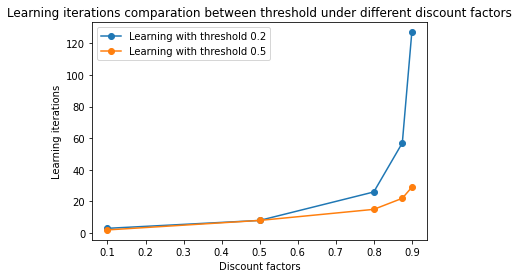

In [ ]:
learning_cod2 = np.array([it_1_2,it_5_2,it_8_2,it_875_2,it_9_2])
learning_cod5 = np.array([it_1_5,it_5_5,it_8_5,it_875_5,it_9_5])

x = np.array([.1,.5,.8,.875,.9])
plt.xlabel('Discount factors')
plt.ylabel('Learning iterations')
plt.plot(x,learning_cod2, '-o',label="Learning with threshold 0.2")
plt.plot(x,learning_cod5, '-o',label="Learning with threshold 0.5")
plt.title("Learning iterations comparation between threshold under different discount factors")
plt.legend(loc="upper left")
plt.show()

### c)

In [ ]:
it_8_2,it_875_2,it_9_2

(26, 57, 127)

From the plot of the learning process, we can find that the smaller threshold setted for our convergence condition, the more learning iterations needed during the value iteration. In addition, learning iterations growth exponentially as the discount factors growth to 1, especially for smaller threshold which we used for getting a more accuracte result: there'are only less than 30 (26) iteratons needed for discount factor = 0.8 under situation when threshold = 0.2, however, when discount factor = 0.9, the iterations needed is exponentially increased to more than 120 (127) times. Therefore, one of the improvement direction for this algorithm can be how to reduce its complexity for computation.

Also, for the game with small discount factor (e.g. 0.1), two companies trend to pick strategy that made more pollution for their short term payoff. While when the discount factor is lager, e.g. 0.8, companies' strategy trend to not pollute to accumulate higher long-term payoff.

In addition, for this game there's a strong hyposthesis that both of the players know each other's action at same time. However, in the real world situation this hypothesis is not always valid. In addition, the alogrithm only considered situation for Nash Equilibrium, but without the strategy for maximum payoff if the opponent is not played with Nash Equilibrium
.

### Reference

SINGH, VIKAS VIKRAM, N. Hemachandra, and KS MALLIKARJUNA RAO. "ON COMPUTING NASH EQUILIBRIUM IN STOCHASTIC GAMES." (2009). https://www.ieor.iitb.ac.in/files/VVS_TR_Jan2011.pdf